In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
mt = Base.classes.measurement
st = Base.classes.station

# Creates a session to our DB. 
session = Session(engine)

AttributeError: measurements

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
# reorders by descending and pulls the first entry.
date = session.query(mt.date).order_by(mt.date.desc()).all()
date[0][0]

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08

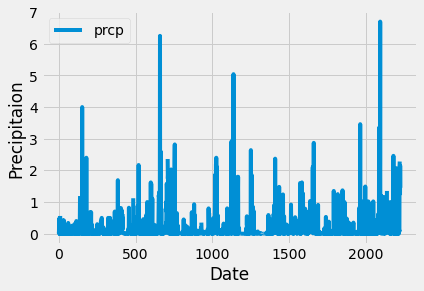

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Recent = dt.strptime(date[0][0], '%Y-%m-%d')
#a will hold the length of the last 12 months of prec. data.
a = 0
# Calculate the date one year from the last date in data set.
for _ in range(0, session.query(mt).count()):
        
    #last calculated x value is the date one year prior to most recent date.
    x = dt.strptime(date[_][0], '%Y-%m-%d')
    DT_manip = Recent - x
    
    #if length of DT manip result is < 365, add to counter. else break.  
    if(DT_manip.days < 365):
        a = a + 1
    else:
        break

# Perform a query to retrieve the data and precipitation scores
dfdict = {}
datap = []
datal = []
for row in session.query(mt.date, mt.prcp).order_by(mt.date.desc()).limit(a).all():
    datal.append(row[0])
    datap.append(row[1])

dfdict["date"] = datal
dfdict['prcp'] = datap
# Save the query results as a Pandas DataFrame and set the index to the date column
yearprcp_df = pd.DataFrame(dfdict)
yearprcp_df.set_index('date')




# Use Pandas Plotting with Matplotlib to plot the data

ax = yearprcp_df.plot()
ax.set_xlabel("Date")
ax.set_ylabel('Precipitaion')
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
session.query(st).count()



9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = session.query(st.station).all()
scount = []
for i in range(0, session.query(st).count()):
    count = session.query(mt).filter(mt.station == stations[i][0]).count()
    scount.append(count)
    
station_dict = {}
station_dict['stations'] = stations
station_dict['count'] = scount

stations_df = pd.DataFrame(station_dict)

stations_df.sort_values(by=['count'], ascending = False)

,stations,count
6,(USC00519281),2772
0,(USC00519397),2724
1,(USC00513117),2709
5,(USC00519523),2669
8,(USC00516128),2612
2,(USC00514830),2202
7,(USC00511918),1979
3,(USC00517948),1372
4,(USC00518838),511


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activestation = stations[6][0]

smax = session.query(func.max(mt.tobs)).filter(mt.station == activestation).all()
smin = session.query(func.min(mt.tobs)).filter(mt.station == activestation).all()
savg = session.query(func.avg(mt.tobs)).filter(mt.station == activestation).all()

print('Max is {}, Min is {}, Avg is {}'.format(smax[0][0], smin[0][0], savg[0][0]))

Max is 85.0, Min is 54.0, Avg is 71.66378066378067


In [ ]:
#Looks for most recent date of most active station
dateactive = session.query(mt.date).order_by(mt.date.desc()).filter(mt.station == activestation)

Recent2 = dt.strptime(dateactive[0][0] , '%Y-%m-%d') 

#g is a counter for rows satisfying the next if statement.
g = 0
#uses a similar method from cell8 to find the last 12 months of data. Also sorts by station using where().
for _ in range(0, session.query(mt).filter(mt.station == activestation).count()):
      
    #last calculated x value is the date one year prior to most recent date.
    x = dt.strptime(dateactive[_][0], '%Y-%m-%d')
    DT_manip = Recent2 - x
    
    #if length of DT manip result is < 365, add to counter. else break.  
    if(DT_manip.days < 365):
        g = g + 1
    else:
        break
        
tobs = session.query(mt.date, mt.station, mt.tobs).filter(mt.station == activestation).order_by(mt.date.desc()).limit(g).all()
popStation_Df = pd.DataFrame(tobs)

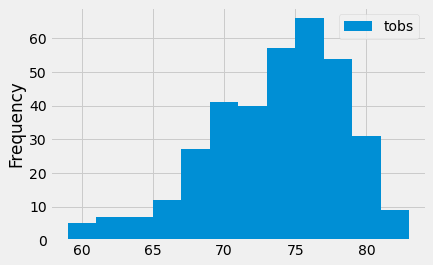

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
popStation_Df.plot.hist(bins = 12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()